In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('../CSVs/hindu_articles.csv')
df.head(10)

,name,date,location,category,author,body
0,Juvenile users of Chinese gay app contract HIV,"January 06, 2019",Health,"Sci-Tech,Health",NaN,Chinese gay dating app Blued is halting new us...
1,21dcangr-ctte-cGNE54S5ME3jpgjpg,"December 28, 2018",DOWN TOWN,"Today's Paper,FEATURES,DOWN TOWN",NaN,Students stage a dance based on the theme of HIV.
2,A year that saw Tamil Nadu's health sector sta...,"December 30, 2018",Tamil Nadu,"News,States,Tamil Nadu",Serena Josephine M,The year was one of ups and downs for the heal...
3,‘Many combination drugs not approved by regula...,"December 11, 2018",NATIONAL,"Today's Paper,NATIONAL",Afshan Yasmeen,Of the 110 anti-TB (tuberculosis) Fixed Dose C...
4,HIV reality check,"December 31, 2018",OPINION,"Today's Paper,OPINION",NaN,A 23-year-old pregnant woman in Tamil Nadu tes...
5,Madurai Today,"January 05, 2019",TAMIL NADU,"Today's Paper,NATIONAL,TAMIL NADU",NaN,RELIGION\n\nSelva Vinayagar Temple: Discourse ...
6,"Letters to the Editor - January 1, 2019","January 01, 2019",Letters,"Opinion,Letters",NaN,Modern icons\n\nEquating our icons with the na...
7,"A long, tiring journey no longer","December 16, 2018",KERALA,"Today's Paper,NATIONAL,KERALA",RADHAKRISHNAN KUTTOOR,"Every week, he would board a train for Chennai..."
8,‘Lacunae in blood collection will be fixed’,"December 28, 2018",TAMIL NADU,"Today's Paper,NATIONAL,TAMIL NADU",NaN,Highlighting that a detailed investigation int...
9,"Sandesha awards for Prasanna, Rohini","December 05, 2018",KARNATAKA,"Today's Paper,NATIONAL,KARNATAKA",NaN,"Theatre personality and activist Prasanna, wri..."


In [3]:
from datetime import datetime, timedelta
from collections import Counter
years = [x[-4:] for x in df['date']]
day = [x[-8:-6] for x in df['date']]
month = [x[:-9] for x in df['date']]
years = pd.Series(years)
month = pd.Series(month)
day = pd.Series(day)
count = Counter(month)
count

Counter({'January': 1579,
         'December': 3361,
         'November': 2020,
         'October': 1504,
         'August': 1617,
         'July': 1823,
         'June': 1538,
         'May': 1496,
         'April': 1361,
         'September': 1663,
         'March': 1939,
         'February': 1574,
         '': 1})

In [4]:
keys = list(count.keys())[:-1]
values = list(count.values())[:-1]
final = pd.DataFrame(keys, columns=['month'])
months_sorted = sorted(keys, key=lambda day: datetime.strptime(day, "%B"))
months_sorted = pd.DataFrame(months_sorted, columns=['month'])
final['articles'] = values
final = months_sorted.set_index('month').join(final.set_index('month'))

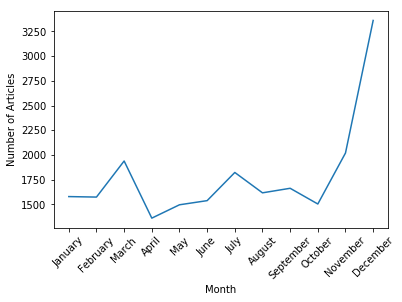

In [5]:
fig = plt.figure()
ax1 = plt.subplot()
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
plt.xlabel('Month')
plt.ylabel('Number of Articles')
ax1.plot(final)